In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

In [2]:
PATH = "data/"
os.chdir(PATH)
files = os.listdir()
len(files)

127

In [3]:
months_tr_to_en = {
    'OCAK': 'January',
    'ŞUBAT': 'February',
    'MART': 'March',
    'NİSAN': 'April',
    'MAYIS': 'May',
    'HAZİRAN': 'June',
    'TEMMUZ': 'July',
    'AĞUSTOS': 'August',
    'EYLÜL': 'September',
    'EKİM': 'October',
    'KASIM': 'November',
    'ARALIK': 'December'
}


In [4]:
main_data = pd.DataFrame()
cols = ["MARKA","YERLI_ADET","ITHAL_ADET","TOPLAM","HT_YERLI","HT_ITHAL","HT_TOPLAM","TTL_YERLI","TTL_ITHAL","TTL_TOPLAM"]
for file in files:
    ## read data
    data = pd.read_excel(file)

    ## drop row with all NA
    data = data.dropna(how="all").reset_index(drop= True)

    print(file)
    ## setup column names
    data.columns = cols

    ## put date information
    text = data.iloc[0].dropna().values[0]

    ## drop unnecesary rows
    data = data.loc[1:].reset_index(drop= True)


    ## drop last row
    data = data.drop(data.shape[0] -1, axis= 0)

    ## drop NA from "MARKA" column & reset index
    data = data.drop(data[(data.MARKA.isna()) | (data.MARKA == "MARKA") | (data.MARKA.str.startswith("TOPLAM"))].index,axis = 0).reset_index(drop=True)

    ## create empty date feature
    data["Date"] = np.NaN
    
    ## some process for clean date data
    text = text.replace("-"," ")
    if ": " in text:
        text = text.split(": ")[-1]
    else:
        text = text.split(":")[-1]
    
    ## remove '\n' value
    text = text.strip()

    ## convert turkish month name to english
    for tr, en in months_tr_to_en.items():
        if tr in text:
            text = text.replace(tr, en)
            break
    
    ## assumption empty date to text value
    data["Date"] = text

    ## fill 0 to all NA values
    data = data.fillna(0)

    ## date process
    data["Date"] = pd.to_datetime(data['Date'], format='%B %Y')
    data["Date"] = data["Date"].dt.strftime('%Y-%m-%d')

    ## concat main data and monthly data
    main_data = pd.concat([main_data,data],axis = 0)

main_data["MARKA"] = main_data["MARKA"].str.replace("İ","I")
main_data["Date"] = pd.to_datetime(main_data.Date)


2015Agustos.xlsx
2015Aralik.xlsx
2015Ekim.xlsx
2015Eylul.xlsx
2015Kasim.xlsx
2015Temmuz.xlsx
2016 Ağustos Perakende Satışlar (Yerli & İthal).xlsx
2016 Ekim Perakende Satışlar (Yerli & İthal).xlsx
2016 Eylül Perakende Satışlar (Yerli & İthal).xlsx
2016 Temmuz Perakende Satışlar (Yerli & İthal).xlsx
2016 Yılı (Aralık) Perakende Satışlar (Yerli & İthal).xlsx
2016 Yılı (Kasım) Perakende Satışlar (Yerli & İthal).xlsx,.xlsx
2016 Yılı Haziran Perakende Satışlar (Yerli & İthal).xlsx
2016mart.xlsx
2016mayis.xlsx
2016Nisan.xlsx
2016ocak.xlsx
2016subat.xlsx
2017 ARALIK PERAKENDE SATIŞLAR YERLİ İTHAL DAĞILIMI.XLSX
2017 EKİM PERAKENDE SATIŞLAR YERLİ İTHAL DAĞILIMI.xlsx
2017 KASIM PERAKENDE SATIŞLAR YERLİ İTHAL DAĞILIMI.XLSX
2017 Yılı (Ocak) Perakende Satışlar (Yerli & İthal)-2.xlsx
2017 Yılı (Şubat) Perakende Satışlar (Yerli & İthal)-2.xlsx.xls
2017 Yılı Ağustos Perakende Satışlar (Yerli  İthal).xlsx
2017 Yılı Eylül Perakende Satışlar (Yerli  İthal).xlsx
2017 Yılı Haziran Perakende Satışlar (Yerli 

In [5]:
d = main_data["MARKA"].value_counts().sort_values(ascending=True).reset_index()

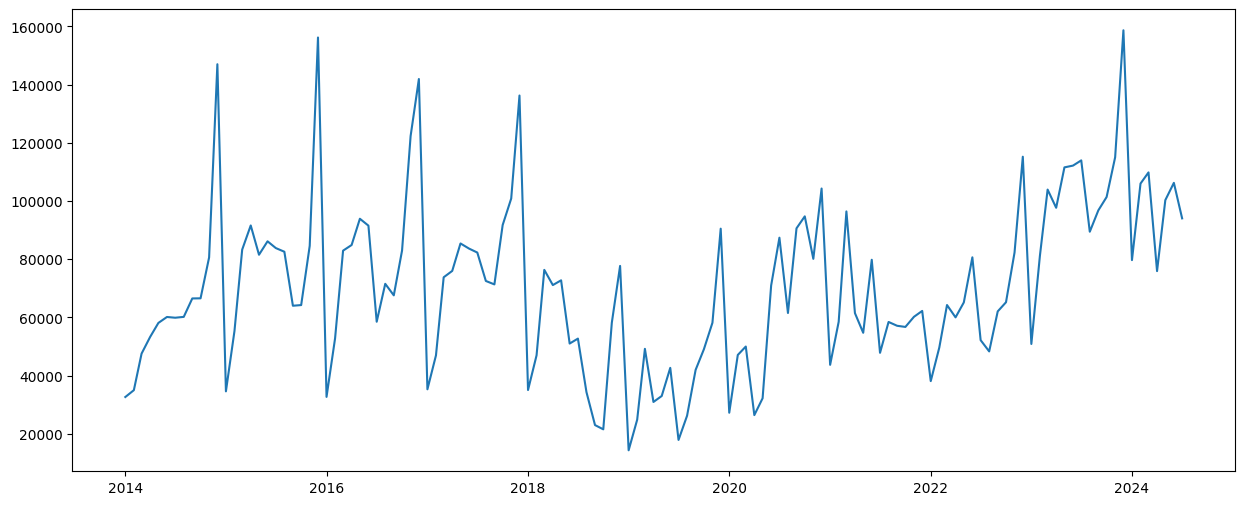

In [6]:
monthly = main_data[["Date","TTL_TOPLAM"]].groupby("Date").agg({"TTL_TOPLAM":"sum"}).reset_index()
plt.figure(figsize=(15,6))
plt.plot(monthly["Date"],monthly["TTL_TOPLAM"])
plt.show()

In [7]:
monthly["Date"] = pd.to_datetime(monthly.Date)
monthly.sort_values(ascending= False,by = "Date").head(20)

,Date,TTL_TOPLAM
126,2024-07-01,94037
125,2024-06-01,106238
124,2024-05-01,100305
123,2024-04-01,75919
122,2024-03-01,109828
121,2024-02-01,105990
120,2024-01-01,79701
119,2023-12-01,158653
118,2023-11-01,115040
117,2023-10-01,101367


In [8]:
main_data.to_excel("ODMD_MainData.xlsx",index= False)